In [1]:
import pandas as pd
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RESULTS_PATH = '../data/results'

In [3]:
# for each folder in the RESULTS_PATH directory (each folder corresponds to a different experiment) with a scores.json file
scores = {}
for folder in os.listdir(RESULTS_PATH):
    scores_path = os.path.join(RESULTS_PATH, folder, 'scores.json')
    if os.path.exists(scores_path):
        with open(scores_path) as f:
            scores[folder] = json.load(f)
            

In [4]:
# create a DataFrame with the scores
scores_df = pd.DataFrame(scores)
# set score_name as index
scores_df['score_name'] = scores_df.index

# melt the DataFrame to have a column for each experiment
scores_df = pd.melt(scores_df, id_vars='score_name', var_name='experiment', value_name='score')


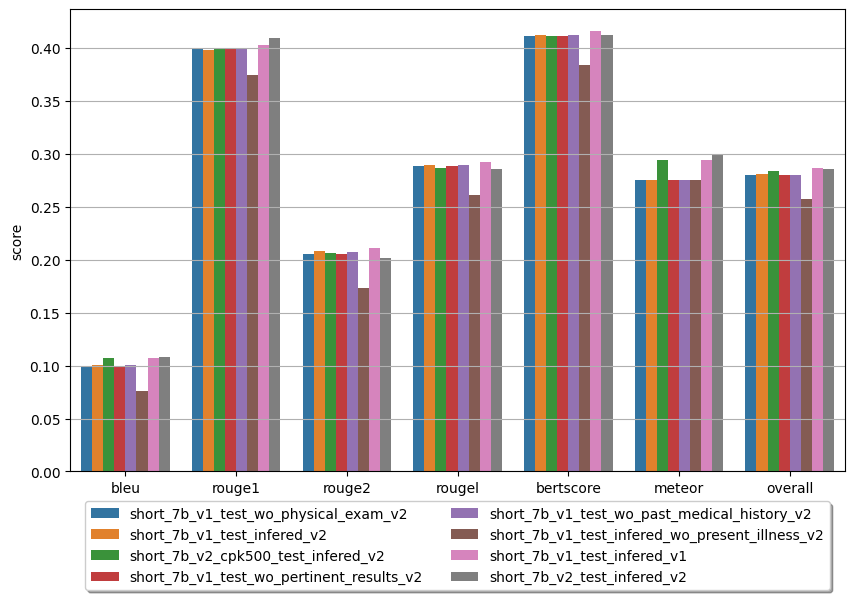

In [5]:
# plot histogram grouped by score type (column)
fig = plt.figure(figsize=(10, 6))
plt.grid()
sns.barplot(data=scores_df, x="score_name", y="score", hue="experiment")
# legend under the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

In [17]:
score_bhc_400 = pd.read_json('../data/experiments/7B_bhc_v4_cpk_400/score/BHC/scores.json', orient='records', typ='series')
score_bhc_1200 = pd.read_json('../data/experiments/7B_bhc_v4_cpk_1200/score/BHC/scores.json', orient='records', typ='series')
score_di_800 = pd.read_json('../data/experiments/7B_di_v4_cpk_800/score/DI/scores.json', orient='records', typ='series')
score_di_2000 = pd.read_json('../data/experiments/7B_di_v4_cpk_2000/score/DI/scores.json', orient='records', typ='series')

# create a DataFrame with the scores
scores_df = pd.DataFrame({'BHC_400': score_bhc_400, 'BHC_1200': score_bhc_1200, 'DI_800': score_di_800, 'DI_2000': score_di_2000})
# set score_name as index
scores_df['score_name'] = scores_df.index

# melt the DataFrame to have a column for each experiment
scores_df = pd.melt(scores_df, id_vars='score_name', var_name='experiment', value_name='score')

FileNotFoundError: File ../data/experiments/7B_di_v4_cpk_1500/score/DI/scores.json does not exist

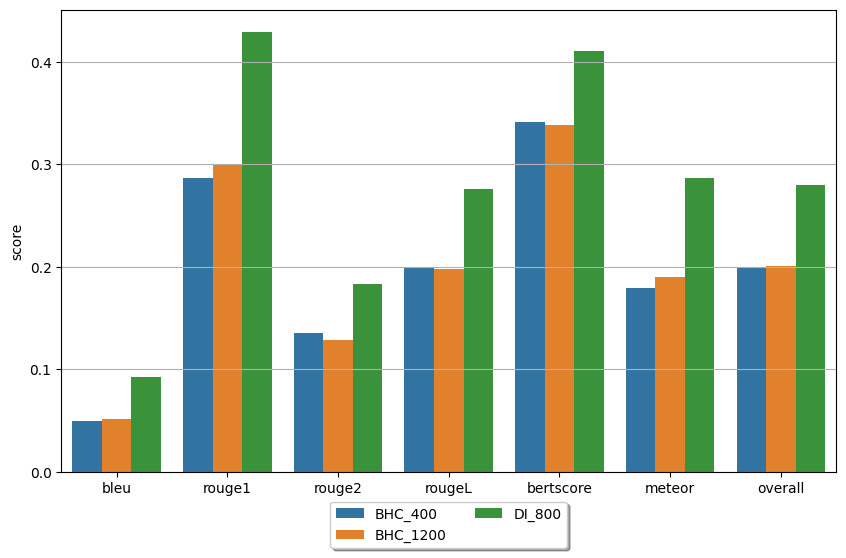

In [16]:
# plot histogram grouped by score type (column)
fig = plt.figure(figsize=(10, 6))
plt.grid()
sns.barplot(data=scores_df, x="score_name", y="score", hue="experiment")
# legend under the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

plt.show()

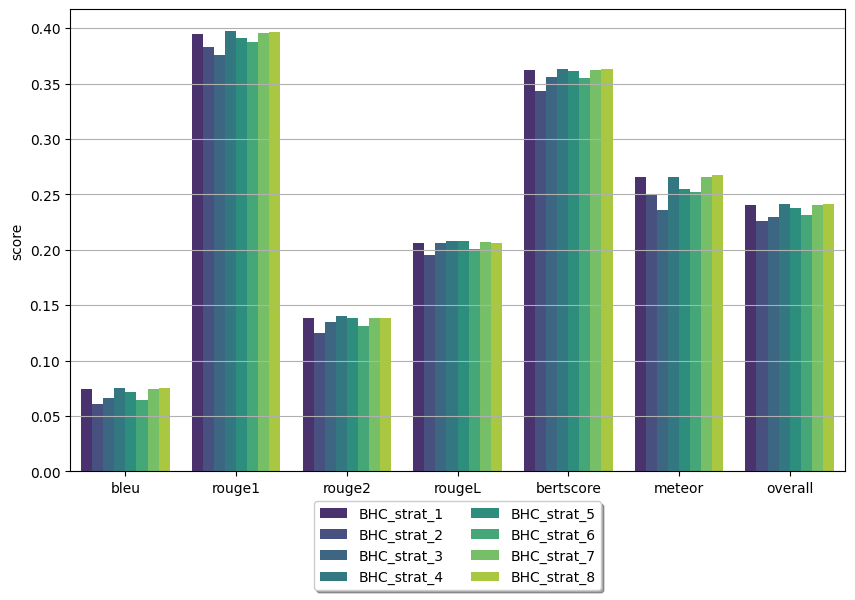

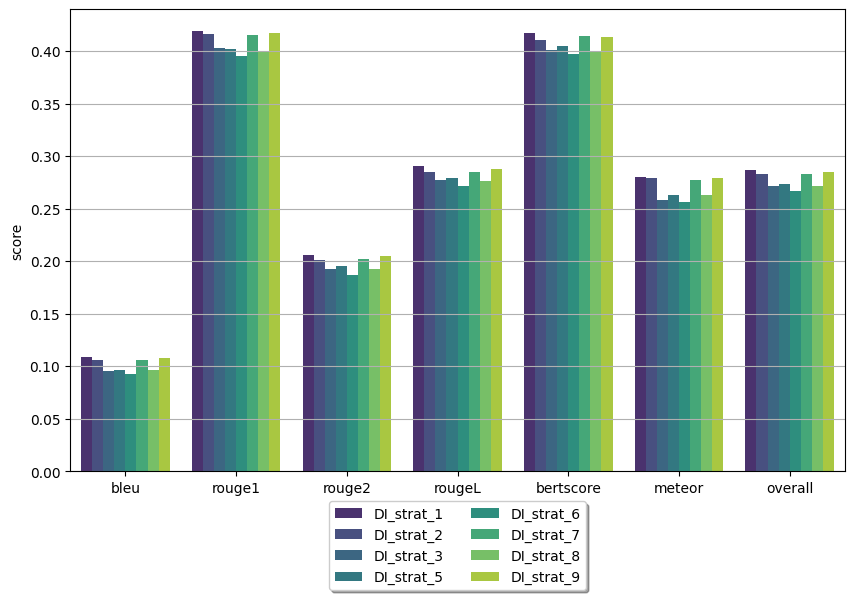

In [2]:
score_bhc_strat_1 = pd.read_json('../data/ablation_study2.0/bhc_strat_1/scores.json', orient='records', typ='series')
score_bhc_strat_2 = pd.read_json('../data/ablation_study2.0/bhc_strat_2/scores.json', orient='records', typ='series')
score_bhc_strat_3 = pd.read_json('../data/ablation_study2.0/bhc_strat_3/scores.json', orient='records', typ='series')
score_bhc_strat_4 = pd.read_json('../data/ablation_study2.0/bhc_strat_4/scores.json', orient='records', typ='series')
score_bhc_strat_5 = pd.read_json('../data/ablation_study2.0/bhc_strat_5/scores.json', orient='records', typ='series')
score_bhc_strat_6 = pd.read_json('../data/ablation_study2.0/bhc_strat_6/scores.json', orient='records', typ='series')
score_bhc_strat_7 = pd.read_json('../data/ablation_study2.0/bhc_strat_7/scores.json', orient='records', typ='series')
score_bhc_strat_8 = pd.read_json('../data/ablation_study2.0/bhc_strat_8/scores.json', orient='records', typ='series')

score_di_strat_1 = pd.read_json('../data/ablation_study2.0/di_strat_1/scores.json', orient='records', typ='series')
score_di_strat_2 = pd.read_json('../data/ablation_study2.0/di_strat_2/scores.json', orient='records', typ='series')
score_di_strat_3 = pd.read_json('../data/ablation_study2.0/di_strat_3/scores.json', orient='records', typ='series')
#score_di_strat_4 = pd.read_json('../data/ablation_study2.0/di_strat_4/scores.json', orient='records', typ='series')
score_di_strat_5 = pd.read_json('../data/ablation_study2.0/di_strat_5/scores.json', orient='records', typ='series')
score_di_strat_6 = pd.read_json('../data/ablation_study2.0/di_strat_6/scores.json', orient='records', typ='series')
score_di_strat_7 = pd.read_json('../data/ablation_study2.0/di_strat_7/scores.json', orient='records', typ='series')
score_di_strat_8 = pd.read_json('../data/ablation_study2.0/di_strat_8/scores.json', orient='records', typ='series')
score_di_strat_9 = pd.read_json('../data/ablation_study2.0/di_strat_9/scores.json', orient='records', typ='series')

# create a DataFrame with the scores
scores_bhc_strat_df = pd.DataFrame({'BHC_strat_1': score_bhc_strat_1, 'BHC_strat_2': score_bhc_strat_2, 'BHC_strat_3': score_bhc_strat_3, 'BHC_strat_4': score_bhc_strat_4, 'BHC_strat_5': score_bhc_strat_5, 'BHC_strat_6': score_bhc_strat_6, 'BHC_strat_7': score_bhc_strat_7, 'BHC_strat_8': score_bhc_strat_8})
scores_di_strat_df = pd.DataFrame({'DI_strat_1': score_di_strat_1, 'DI_strat_2': score_di_strat_2, 'DI_strat_3': score_di_strat_3, 
                                   #'DI_strat_4': score_di_strat_4,
                                   'DI_strat_5': score_di_strat_5, 'DI_strat_6': score_di_strat_6, 'DI_strat_7': score_di_strat_7, 'DI_strat_8': score_di_strat_8, 'DI_strat_9': score_di_strat_9})

# set score_name as index
scores_bhc_strat_df['score_name'] = scores_bhc_strat_df.index
scores_di_strat_df['score_name'] = scores_di_strat_df.index

# plot histogram grouped by score type (column)
fig = plt.figure(figsize=(10, 6))
plt.grid()
sns.barplot(data=pd.melt(scores_bhc_strat_df, id_vars='score_name', var_name='experiment', value_name='score'), x="score_name", y="score", hue="experiment", palette='viridis')
# legend under the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

plt.show()

fig = plt.figure(figsize=(10, 6))
plt.grid()
sns.barplot(data=pd.melt(scores_di_strat_df, id_vars='score_name', var_name='experiment', value_name='score'), x="score_name", y="score", hue="experiment", palette='viridis')
# legend under the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

plt.show()

In [80]:
bhc_strategies = pd.read_json('../src/inference/ablation_strategies/bhc_ablation_strategies.jsonl', lines=True)
di_strategies = pd.read_json('../src/inference/ablation_strategies/di_ablation_strategies.jsonl', lines=True)

In [81]:
bhc_strategies

,strat_idx,strat
0,1,"[sex, service, allergies, chief_complaint, maj..."
1,2,"[sex, service, allergies, chief_complaint, maj..."
2,3,"[sex, service, allergies, chief_complaint, maj..."
3,4,"[sex, service, allergies, chief_complaint, maj..."
4,5,"[sex, service, allergies, chief_complaint, maj..."
5,6,"[sex, service, allergies, chief_complaint, his..."
6,7,"[sex, service, allergies, chief_complaint, maj..."
7,8,"[sex, service, allergies, chief_complaint, maj..."


In [82]:
# strat column is a list of strings and i want to find all the unique strings
unique_strats_bhc = set()
for i in range(len(bhc_strategies)):
    unique_strats_bhc.update(bhc_strategies['strat'][i])
    
unique_strats_di = set()
for i in range(len(di_strategies)):
    unique_strats_di.update(di_strategies['strat'][i])
    

In [86]:
# baseline is BHC_strat_1 overall score
bhc_baseline = scores_bhc_strat_df['BHC_strat_1']['overall']
scores_bhc_strat_df_T = scores_bhc_strat_df.drop(columns=['score_name']).T
scores_bhc_strat_df_T['overall_diff'] = 100 * (scores_bhc_strat_df_T['overall'] - bhc_baseline) / bhc_baseline

scores_bhc_strat_df_T['strat_id'] = scores_bhc_strat_df_T.index.map(lambda x: int(x.split('_')[-1]))
scores_bhc_strat_df_T['missing_strats'] = None
# find the sections in unique_strats_bhc that are not in bhc_strategies 'strat' column for each experiment and add them to the DataFrame
for i in bhc_strategies['strat_idx']:
    missing_strats = list(unique_strats_bhc - set(bhc_strategies[bhc_strategies['strat_idx'] == i]['strat'].values[0]))
    if len(missing_strats) == 0:
        missing_strats = None
    else:
        missing_strats = ', '.join(missing_strats)
        
    # assign the missing_strats to the corresponding row at 'missing_strats' column
    scores_bhc_strat_df_T.loc[f'BHC_strat_{i}', 'missing_strats'] = missing_strats
    
scores_bhc_strat_df_T.sort_values(by='overall_diff', ascending=False)

,bleu,rouge1,rouge2,rougeL,bertscore,meteor,overall,overall_diff,strat_id,missing_strats
BHC_strat_4,0.075196,0.397142,0.140073,0.207936,0.363143,0.265320,0.241468,0.533516,4,past_medical_history
BHC_strat_8,0.075343,0.396782,0.138673,0.206281,0.362804,0.267990,0.241312,0.468442,8,family_history
BHC_strat_7,0.074868,0.395865,0.138592,0.207069,0.362233,0.265395,0.240670,0.201265,7,social_history
BHC_strat_1,0.074244,0.394391,0.138479,0.206343,0.362233,0.265430,0.240187,0.000000,1,None
BHC_strat_5,0.071269,0.391672,0.138191,0.207718,0.361516,0.255081,0.237574,-1.087711,5,physical_exam
BHC_strat_6,0.064430,0.387744,0.131338,0.200444,0.354954,0.252133,0.231840,-3.474974,6,major_surgical_procedures
BHC_strat_3,0.066627,0.375743,0.135101,0.206337,0.355817,0.236187,0.229302,-4.531824,3,pertinent_results
BHC_strat_2,0.060920,0.383184,0.124557,0.195192,0.343698,0.249647,0.226200,-5.823445,2,history_of_present_illness


In [85]:
# baseline is DI_strat_1 overall score
di_baseline = scores_di_strat_df['DI_strat_1']['overall']
scores_di_strat_df_T = scores_di_strat_df.drop(columns=['score_name']).T
scores_di_strat_df_T['overall_diff'] = 100 * (scores_di_strat_df_T['overall'] - di_baseline) / di_baseline

scores_di_strat_df_T['strat_id'] = scores_di_strat_df_T.index.map(lambda x: int(x.split('_')[-1]))
scores_di_strat_df_T['missing_strats'] = None
# find the sections in unique_strats_bhc that are not in bhc_strategies 'strat' column for each experiment and add them to the DataFrame
for i in di_strategies['strat_idx']:
    print(di_strategies[di_strategies['strat_idx'] == i]['strat'].values[0])
    missing_strats = list(unique_strats_di - set(di_strategies[di_strategies['strat_idx'] == i]['strat'].values[0]))
    if len(missing_strats) == 0:
        missing_strats = None
    else:
        missing_strats = ', '.join(missing_strats)
        
    # assign the missing_strats to the corresponding row at 'missing_strats' column
    scores_di_strat_df_T.loc[f'DI_strat_{i}', 'missing_strats'] = missing_strats
    
scores_di_strat_df_T.sort_values(by='overall_diff', ascending=False)

['sex', 'service', 'chief_complaint', 'history_of_present_illness', 'physical_exam', 'medication_on_admission', 'discharge_medications', 'discharge_disposition', 'discharge_diagnosis', 'discharge_condition']
['sex', 'service', 'chief_complaint', 'physical_exam', 'medication_on_admission', 'discharge_medications', 'discharge_disposition', 'discharge_diagnosis', 'discharge_condition']
['sex', 'service', 'chief_complaint', 'history_of_present_illness', 'medication_on_admission', 'discharge_medications', 'discharge_disposition', 'discharge_diagnosis', 'discharge_condition']
['sex', 'service', 'chief_complaint', 'history_of_present_illness', 'physical_exam', 'medication_on_admission', 'discharge_disposition', 'discharge_diagnosis', 'discharge_condition']
['sex', 'service', 'chief_complaint', 'history_of_present_illness', 'physical_exam', 'medication_on_admission', 'discharge_medications', 'discharge_disposition', 'discharge_condition']
['sex', 'service', 'chief_complaint', 'history_of_prese

,bleu,rouge1,rouge2,rougeL,bertscore,meteor,overall,overall_diff,strat_id,missing_strats
DI_strat_1,0.108909,0.418675,0.206383,0.290451,0.417541,0.280289,0.287042,0.000000,1,None
DI_strat_9,0.108006,0.417455,0.205227,0.288191,0.413864,0.279315,0.285343,-0.591815,9,medication_on_admission
DI_strat_7,0.106158,0.415101,0.201850,0.285411,0.413961,0.276961,0.283240,-1.324250,7,discharge_disposition
DI_strat_2,0.106472,0.416163,0.201225,0.284595,0.410580,0.278939,0.282996,-1.409447,2,history_of_present_illness
DI_strat_5,0.096897,0.402084,0.195534,0.279016,0.404810,0.263475,0.273636,-4.670247,5,discharge_medications
DI_strat_8,0.096951,0.400113,0.192973,0.275896,0.400217,0.262617,0.271461,-5.427892,8,discharge_condition
DI_strat_3,0.095783,0.402774,0.192839,0.277654,0.400989,0.257902,0.271324,-5.475848,3,physical_exam
DI_strat_6,0.093025,0.395545,0.187401,0.271526,0.397621,0.256770,0.266981,-6.988597,6,discharge_diagnosis


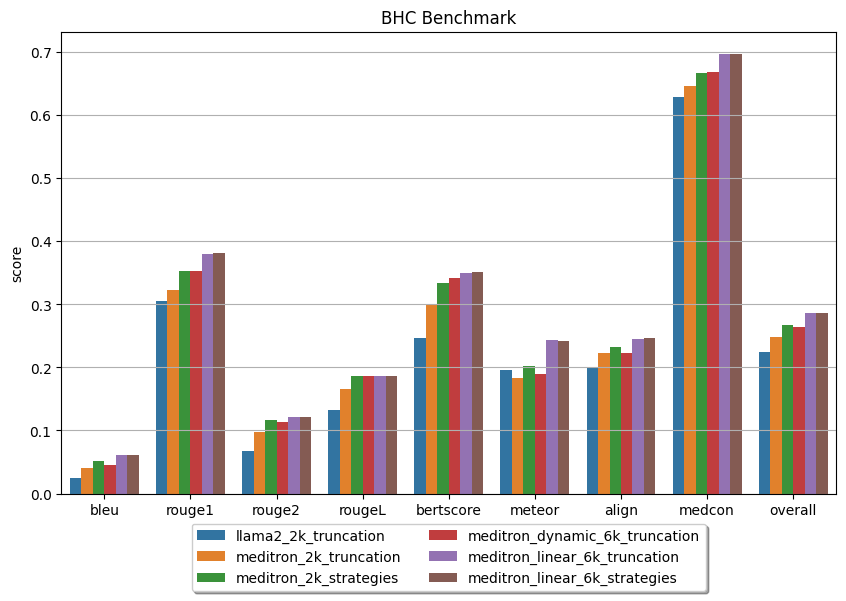

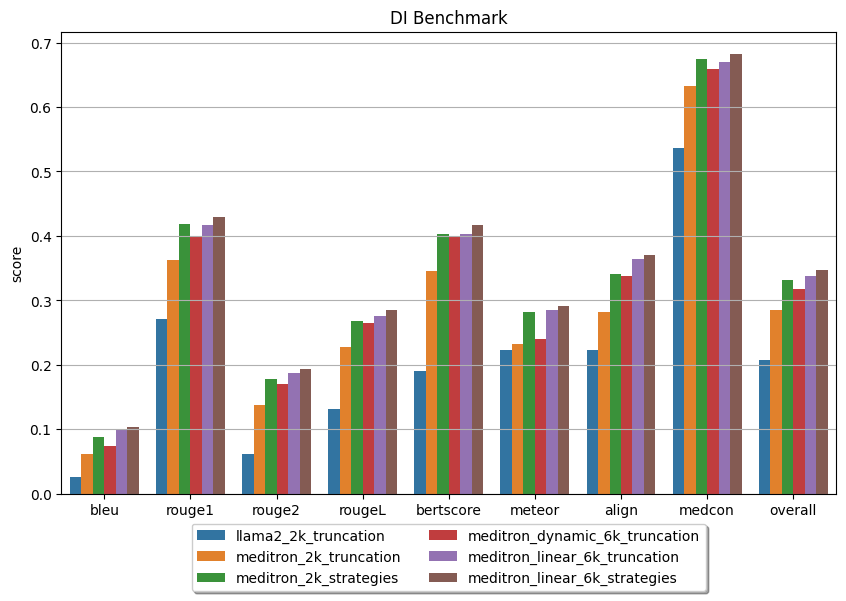

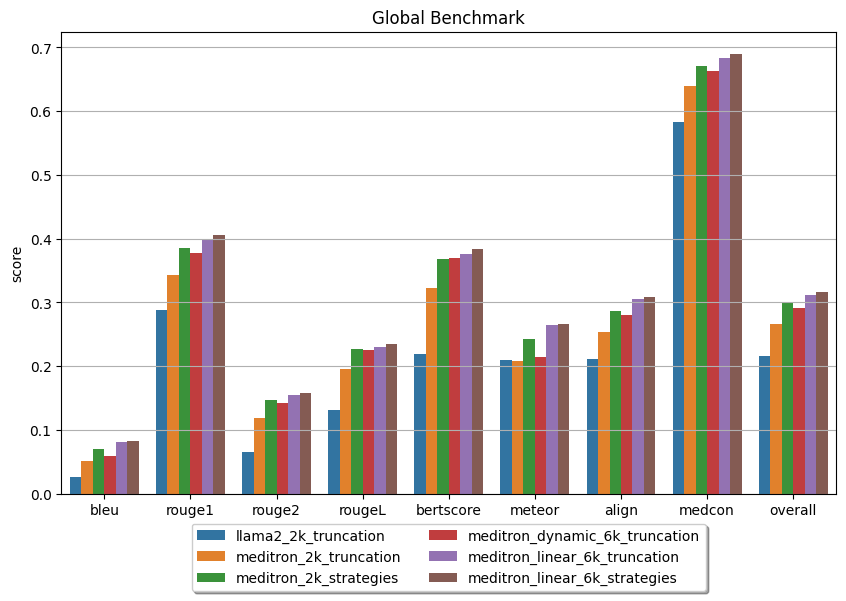

In [21]:
bhc_benchmark_llama2 = pd.read_json('../data/paper_infered/llama2-7b-bhc-p-2k/scores.json', orient='records', typ='series')
bhc_benchmark_meditron_2k = pd.read_json('../data/paper_infered/meditron-7b-bhc-p-2k/scores.json', orient='records', typ='series')
bhc_benchmark_meditron_dynamic_6k = pd.read_json('../data/paper_infered/meditron-7b-bhc-p-d6k/scores.json', orient='records', typ='series')
bhc_benchmark_meditron_linear_6k = pd.read_json('../data/paper_infered/meditron-7b-bhc-p-l6k/scores.json', orient='records', typ='series')
bhc_benchmark_meditron_linear_6k_strategies = pd.read_json('../data/paper_infered/meditron-7b-bhc-p-l6k-s/scores.json', orient='records', typ='series')
bhc_benchmark_meditron_2k_strategies = pd.read_json('../data/paper_infered/meditron-7b-bhc-p-2k-s/scores.json', orient='records', typ='series')
bhc_benchmark_meditron_linear_6k_submission = pd.read_json('../data/submissions/best_bhc/scores.json', orient='records', typ='series')


di_benchmark_llama2 = pd.read_json('../data/paper_infered/llama2-7b-di-p-2k/scores.json', orient='records', typ='series')
di_benchmark_meditron_2k = pd.read_json('../data/paper_infered/meditron-7b-di-p-2k/scores.json', orient='records', typ='series')
di_benchmark_meditron_dynamic_6k = pd.read_json('../data/paper_infered/meditron-7b-di-p-d6k/scores.json', orient='records', typ='series')
di_benchmark_meditron_linear_6k = pd.read_json('../data/paper_infered/meditron-7b-di-p-l6k/scores.json', orient='records', typ='series')
di_benchmark_meditron_linear_6k_strategies = pd.read_json('../data/paper_infered/meditron-7b-di-p-l6k-s/scores.json', orient='records', typ='series')
di_benchmark_meditron_2k_strategies = pd.read_json('../data/paper_infered/meditron-7b-di-p-2k-s/scores.json', orient='records', typ='series')
di_benchmark_meditron_linear_6k_submission = pd.read_json('../data/submissions/best_di/scores.json', orient='records', typ='series')

# create a DataFrame with the scores
bhc_benchmark_df = pd.DataFrame({
    'llama2_2k_truncation': bhc_benchmark_llama2,
    'meditron_2k_truncation': bhc_benchmark_meditron_2k,
    'meditron_2k_strategies': bhc_benchmark_meditron_2k_strategies,
    'meditron_dynamic_6k_truncation': bhc_benchmark_meditron_dynamic_6k,
    'meditron_linear_6k_truncation': bhc_benchmark_meditron_linear_6k,
    'meditron_linear_6k_strategies': bhc_benchmark_meditron_linear_6k_strategies,
    #'meditron_linear_6k_submission': bhc_benchmark_meditron_linear_6k_submission,
    
})
di_benchmark_df = pd.DataFrame({
    'llama2_2k_truncation': di_benchmark_llama2,
    'meditron_2k_truncation': di_benchmark_meditron_2k,
    'meditron_2k_strategies': di_benchmark_meditron_2k_strategies,
    'meditron_dynamic_6k_truncation': di_benchmark_meditron_dynamic_6k,
    'meditron_linear_6k_truncation': di_benchmark_meditron_linear_6k,
    'meditron_linear_6k_strategies': di_benchmark_meditron_linear_6k_strategies,
    #'meditron_linear_6k_submission': di_benchmark_meditron_linear_6k_submission
})

# global score (mean of DI and BHC)
global_score_df = (bhc_benchmark_df + di_benchmark_df) / 2

# set score_name as index
bhc_benchmark_df['score_name'] = bhc_benchmark_df.index
di_benchmark_df['score_name'] = di_benchmark_df.index
global_score_df['score_name'] = global_score_df.index

# melt the DataFrame to have a column for each experiment
bhc_benchmark_df = pd.melt(bhc_benchmark_df, id_vars='score_name', var_name='experiment', value_name='score')
di_benchmark_df = pd.melt(di_benchmark_df, id_vars='score_name', var_name='experiment', value_name='score')
global_score_df = pd.melt(global_score_df, id_vars='score_name', var_name='experiment', value_name='score')

# plot histogram grouped by score type (column)
fig = plt.figure(figsize=(10, 6))
plt.grid()
sns.barplot(data=bhc_benchmark_df, x="score_name", y="score", hue="experiment", palette='tab10')
# legend under the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
plt.title('BHC Benchmark')
plt.show()

# plot histogram grouped by score type (column)
fig = plt.figure(figsize=(10, 6))
plt.grid()
sns.barplot(data=di_benchmark_df, x="score_name", y="score", hue="experiment", palette='tab10')
# legend under the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
plt.title('DI Benchmark')
plt.show()

# plot histogram grouped by score type (column)
fig = plt.figure(figsize=(10, 6))
plt.grid()
sns.barplot(data=global_score_df, x="score_name", y="score", hue="experiment", palette='tab10')
# legend under the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
plt.title('Global Benchmark')
plt.show()


In [9]:
# print overall scores
print('BHC Benchmark')
print(bhc_benchmark_df[bhc_benchmark_df['score_name'] == 'overall'])
print('DI Benchmark')
print(di_benchmark_df[di_benchmark_df['score_name'] == 'overall'])
print('Global Benchmark')
print(global_score_df[global_score_df['score_name'] == 'overall'])

BHC Benchmark
   score_name                      experiment     score
8     overall            llama2_2k_truncation  0.225029
17    overall          meditron_2k_truncation  0.247389
26    overall          meditron_2k_strategies  0.267473
35    overall  meditron_dynamic_6k_truncation  0.264692
44    overall   meditron_linear_6k_truncation  0.285343
53    overall   meditron_linear_6k_strategies  0.285930
62    overall  #meditron_linear_6k_submission  0.288534
DI Benchmark
   score_name                      experiment     score
5     overall            llama2_2k_truncation  0.207613
14    overall          meditron_2k_truncation  0.285295
23    overall          meditron_2k_strategies  0.331584
32    overall  meditron_dynamic_6k_truncation  0.317994
41    overall   meditron_linear_6k_truncation  0.277663
50    overall   meditron_linear_6k_strategies  0.346474
Global Benchmark
   score_name                      experiment     score
5     overall  #meditron_linear_6k_submission       NaN
14  

In [22]:
global_score_df

,score_name,experiment,score
0,bleu,llama2_2k_truncation,0.025753
1,rouge1,llama2_2k_truncation,0.287674
2,rouge2,llama2_2k_truncation,0.065053
3,rougeL,llama2_2k_truncation,0.131454
4,bertscore,llama2_2k_truncation,0.218131
5,meteor,llama2_2k_truncation,0.209159
6,align,llama2_2k_truncation,0.210998
7,medcon,llama2_2k_truncation,0.582347
8,overall,llama2_2k_truncation,0.216321
9,bleu,meditron_2k_truncation,0.050974
